<a href="https://colab.research.google.com/github/scadriano/lia1_2025_1/blob/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/Aula_09_Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

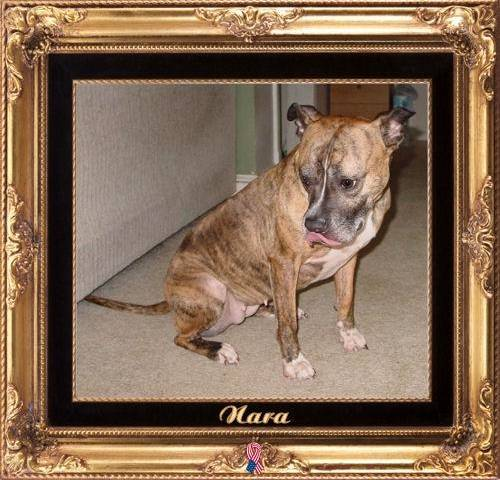

In [ ]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino/dogs/dog.98.jpg')


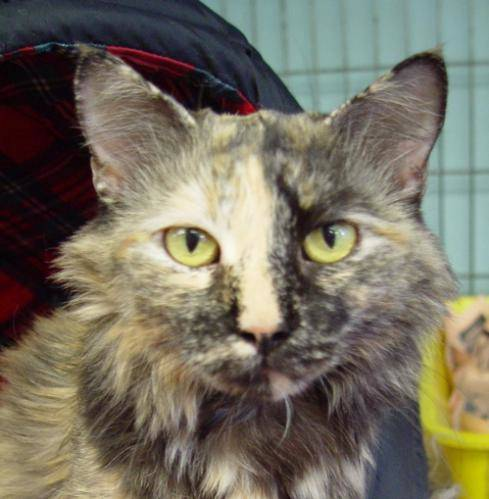

In [ ]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino/cats/cat.10.jpg')

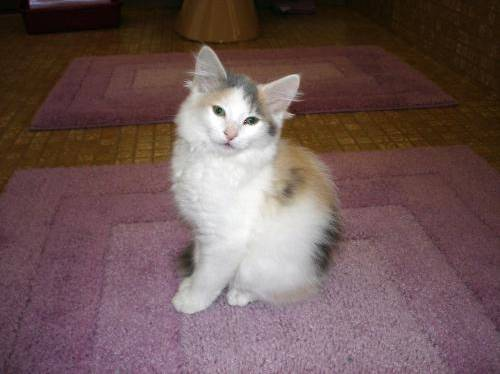

In [ ]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/10.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [ ]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [ ]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [ ]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 802 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

**Treinamento do Modelo**

In [ ]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.5033 - loss: 0.6947
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5560 - loss: 0.6903    
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5484 - loss: 0.6957    
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5728 - loss: 0.6883    
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6010 - loss: 0.6837    
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6064 - loss: 0.6662    
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6392 - loss: 0.6332    
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6317 - loss: 0.6408    
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6424 - loss: 0.6319    
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6918 - loss: 0.6035    


Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Previsão: Gato.
Acurácia: 59.7 %.


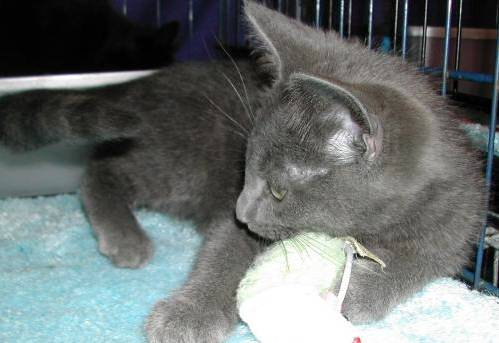

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥